[View in Colaboratory](https://colab.research.google.com/github/purelover7/ML_DL_Tensorflow_study/blob/master/Dog_Cat_300_modi.ipynb)

# Dogs vs. Cats Problem

우선 Train 200(cat: 100, dog: 100), Validate 100(cat: 50, dog: 50)으로 학습시켜본다.

## Colab Data Load

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import files

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2. Get the file
downloaded = drive.CreateFile({'id':'1z462F1zywINc47_hb_tX4SuvE6s4zriX'}) # replace the id with id of file you want to access
downloaded.GetContentFile('data300.zip')

## Zip File Extraction

In [0]:
import zipfile
import os, os.path

In [0]:
DataPath = './data'

In [0]:
objZip = zipfile.ZipFile('./data300.zip')
objZip.extractall(DataPath)

In [0]:
from IPython.display import Image

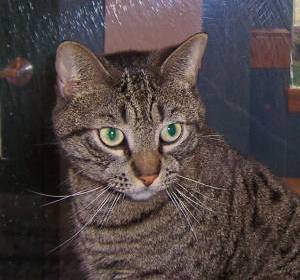

In [8]:
Image('./data/Train/cat/cat.1.jpg')

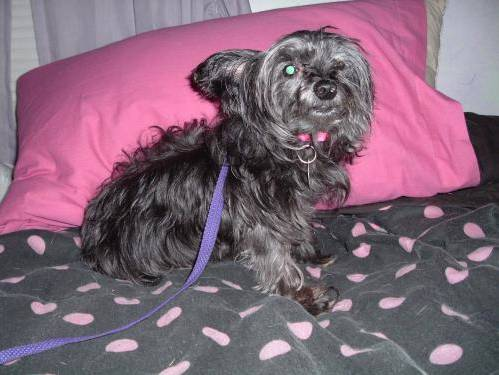

In [9]:
Image('./data/Train/dog/dog.0.jpg')

In [10]:
print("[TestData] Train cat : [%d]" % len(os.listdir('./data/Train/cat/') ) )
print("[TestData] Train dog : [%d]" % len(os.listdir('./data/Train/dog/') ) )

print("[ValidData] Valid cat : [%d]" % len(os.listdir('./data/Valid/cat/') ) )
print("[ValidData] Valid dog : [%d]" % len(os.listdir('./data/Valid/dog/') ) )

[TestData] Train cat : [100]
[TestData] Train dog : [100]
[ValidData] Valid cat : [50]
[ValidData] Valid dog : [50]


Input Data Load SuccessFully!

## Model Construction

In [11]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision

    68% |█████████████████████▊          | 402.9MB 58.7MB/s eta 0:00:04

    100% |████████████████████████████████| 592.3MB 44.0MB/s 
    100% |████████████████████████████████| 61kB 2.3MB/s 
    100% |████████████████████████████████| 2.0MB 9.4MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
import torch
import torchvision
import torchvision.models as models

In [2]:
net = models.vgg.vgg19_bn()
net.children

<bound method Module.children of VGG(
  (features): Sequential(
    (0): Conv2d (3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU(inplace)
    (3): Conv2d (64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (7): Conv2d (64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
    (9): ReLU(inplace)
    (10): Conv2d (128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (14): Conv2d (128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=

In [0]:
import torch.nn as nn

In [0]:
net.classifier = torch.nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 2),
        )

In [5]:
net.children

<bound method Module.children of VGG(
  (features): Sequential(
    (0): Conv2d (3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU(inplace)
    (3): Conv2d (64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (7): Conv2d (64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
    (9): ReLU(inplace)
    (10): Conv2d (128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (14): Conv2d (128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=

In [0]:
from torch.autograd import Variable 

In [7]:
net = net.cuda()
x = Variable.cuda(torch.randn(2,3,224,224))
y = net(x)
print(y)

Variable containing:
 0.2408  0.0894
 0.2080  0.1836
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]



## Apply Data to Model

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [0]:
transform_train = transforms.Compose([
    transforms.Resize((224,224)),
    # transforms.RandomCrop(32, padding=4),
    #transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    # transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

In [0]:
trainset = torchvision.datasets.ImageFolder(root='./data/Train', transform=transform_train)

In [11]:
trainset.classes

['cat', 'dog']

In [12]:
trainset.class_to_idx

{'cat': 0, 'dog': 1}

In [13]:
trainset.imgs

[('./data/Train/cat/cat.0.jpg', 0),
 ('./data/Train/cat/cat.1.jpg', 0),
 ('./data/Train/cat/cat.10.jpg', 0),
 ('./data/Train/cat/cat.11.jpg', 0),
 ('./data/Train/cat/cat.12.jpg', 0),
 ('./data/Train/cat/cat.13.jpg', 0),
 ('./data/Train/cat/cat.14.jpg', 0),
 ('./data/Train/cat/cat.15.jpg', 0),
 ('./data/Train/cat/cat.16.jpg', 0),
 ('./data/Train/cat/cat.17.jpg', 0),
 ('./data/Train/cat/cat.18.jpg', 0),
 ('./data/Train/cat/cat.19.jpg', 0),
 ('./data/Train/cat/cat.2.jpg', 0),
 ('./data/Train/cat/cat.20.jpg', 0),
 ('./data/Train/cat/cat.21.jpg', 0),
 ('./data/Train/cat/cat.22.jpg', 0),
 ('./data/Train/cat/cat.23.jpg', 0),
 ('./data/Train/cat/cat.24.jpg', 0),
 ('./data/Train/cat/cat.25.jpg', 0),
 ('./data/Train/cat/cat.26.jpg', 0),
 ('./data/Train/cat/cat.27.jpg', 0),
 ('./data/Train/cat/cat.28.jpg', 0),
 ('./data/Train/cat/cat.29.jpg', 0),
 ('./data/Train/cat/cat.3.jpg', 0),
 ('./data/Train/cat/cat.30.jpg', 0),
 ('./data/Train/cat/cat.31.jpg', 0),
 ('./data/Train/cat/cat.32.jpg', 0),
 ('./

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=20, shuffle=True, num_workers=2)

In [0]:
criterion = nn.CrossEntropyLoss().cuda()

In [0]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)

In [0]:
# Training
def train(epoch):
    print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0.0
    correct = 0.0
    total = 0.0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        # inputs, targets = inputs.to(device), targets.to(device)
        inputs, targets = Variable.cuda(inputs), Variable.cuda(targets)
        # print(batch_idx)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        # train_loss += loss.item()
        train_loss += loss
        _, predicted = outputs.max(1)
        total += targets.size(0)
        # correct += predicted.eq(targets).sum().item()
        correct += predicted.eq(targets).long().sum()
                
        
        print('Loss: %.3f | Acc: %.3f%% (%d/%d)'% (train_loss/(batch_idx+1), 100.*correct/total, correct, total))
        #progress_bar(batch_idx, len(trainloader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
        #    % (train_loss/(batch_idx+1), 100.*correct/total, correct, total))

In [0]:
testset = torchvision.datasets.ImageFolder(root='./data/Valid', transform=transform_train)

In [19]:
testset.classes

['cat', 'dog']

In [20]:
testset.class_to_idx

{'cat': 0, 'dog': 1}

In [21]:
testset.imgs

[('./data/Valid/cat/cat.100.jpg', 0),
 ('./data/Valid/cat/cat.101.jpg', 0),
 ('./data/Valid/cat/cat.102.jpg', 0),
 ('./data/Valid/cat/cat.103.jpg', 0),
 ('./data/Valid/cat/cat.104.jpg', 0),
 ('./data/Valid/cat/cat.105.jpg', 0),
 ('./data/Valid/cat/cat.106.jpg', 0),
 ('./data/Valid/cat/cat.107.jpg', 0),
 ('./data/Valid/cat/cat.108.jpg', 0),
 ('./data/Valid/cat/cat.109.jpg', 0),
 ('./data/Valid/cat/cat.110.jpg', 0),
 ('./data/Valid/cat/cat.111.jpg', 0),
 ('./data/Valid/cat/cat.112.jpg', 0),
 ('./data/Valid/cat/cat.113.jpg', 0),
 ('./data/Valid/cat/cat.114.jpg', 0),
 ('./data/Valid/cat/cat.115.jpg', 0),
 ('./data/Valid/cat/cat.116.jpg', 0),
 ('./data/Valid/cat/cat.117.jpg', 0),
 ('./data/Valid/cat/cat.118.jpg', 0),
 ('./data/Valid/cat/cat.119.jpg', 0),
 ('./data/Valid/cat/cat.120.jpg', 0),
 ('./data/Valid/cat/cat.121.jpg', 0),
 ('./data/Valid/cat/cat.122.jpg', 0),
 ('./data/Valid/cat/cat.123.jpg', 0),
 ('./data/Valid/cat/cat.124.jpg', 0),
 ('./data/Valid/cat/cat.125.jpg', 0),
 ('./data/Va

In [0]:
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False, num_workers=2)

In [0]:
def test(epoch):
    # global best_acc
    print('\nEpoch: %d' % epoch)
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    # with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(testloader):
        #inputs, targets = inputs.to(device), targets.to(device)
        inputs, targets = Variable.cuda(inputs), Variable.cuda(targets)
        # print(inputs)
        # print(batch_idx)
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        
        # test_loss += loss.item()
        test_loss += loss
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).long().sum()

        print('Loss: %.3f | Acc: %.3f%% (%d/%d)'% (test_loss/(batch_idx+1), 100.*correct/total, correct, total))

        # progress_bar(batch_idx, len(testloader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
        #    % (test_loss/(batch_idx+1), 100.*correct/total, correct, total))

In [25]:
start_epoch = 0
for epoch in range(start_epoch, start_epoch+30):
    train(epoch)
    # test(epoch)


Epoch: 0
Loss: 0.622 | Acc: 55.000% (11/20)
Loss: 0.851 | Acc: 52.000% (21/40)
Loss: 0.710 | Acc: 63.000% (38/60)
Loss: 0.668 | Acc: 65.000% (52/80)
Loss: 0.624 | Acc: 66.000% (66/100)
Loss: 0.694 | Acc: 64.000% (77/120)
Loss: 0.695 | Acc: 65.000% (92/140)
Loss: 0.662 | Acc: 66.000% (107/160)
Loss: 0.680 | Acc: 67.000% (121/180)
Loss: 0.670 | Acc: 67.000% (135/200)

Epoch: 1
Loss: 0.857 | Acc: 55.000% (11/20)
Loss: 0.786 | Acc: 60.000% (24/40)
Loss: 0.663 | Acc: 70.000% (42/60)
Loss: 0.712 | Acc: 68.000% (55/80)
Loss: 0.711 | Acc: 70.000% (70/100)
Loss: 0.748 | Acc: 68.000% (82/120)
Loss: 0.713 | Acc: 69.000% (97/140)
Loss: 0.677 | Acc: 71.000% (114/160)
Loss: 0.659 | Acc: 71.000% (129/180)
Loss: 0.685 | Acc: 71.000% (143/200)

Epoch: 2
Loss: 1.271 | Acc: 35.000% (7/20)
Loss: 1.231 | Acc: 47.000% (19/40)
Loss: 0.960 | Acc: 60.000% (36/60)
Loss: 0.825 | Acc: 65.000% (52/80)
Loss: 0.761 | Acc: 67.000% (67/100)
Loss: 0.755 | Acc: 67.000% (81/120)
Loss: 0.717 | Acc: 69.000% (97/140)
Loss:

Loss: 0.230 | Acc: 93.000% (75/80)
Loss: 0.247 | Acc: 91.000% (91/100)
Loss: 0.241 | Acc: 91.000% (110/120)
Loss: 0.247 | Acc: 90.000% (127/140)
Loss: 0.250 | Acc: 90.000% (145/160)
Loss: 0.248 | Acc: 90.000% (162/180)
Loss: 0.273 | Acc: 89.000% (178/200)

Epoch: 8
Loss: 0.271 | Acc: 90.000% (18/20)
Loss: 0.239 | Acc: 87.000% (35/40)
Loss: 0.230 | Acc: 90.000% (54/60)
Loss: 0.251 | Acc: 88.000% (71/80)
Loss: 0.273 | Acc: 86.000% (86/100)
Loss: 0.246 | Acc: 88.000% (106/120)
Loss: 0.238 | Acc: 89.000% (125/140)
Loss: 0.255 | Acc: 88.000% (142/160)
Loss: 0.267 | Acc: 88.000% (159/180)
Loss: 0.267 | Acc: 88.000% (176/200)

Epoch: 9
Loss: 0.254 | Acc: 90.000% (18/20)
Loss: 0.313 | Acc: 82.000% (33/40)
Loss: 0.291 | Acc: 83.000% (50/60)
Loss: 0.336 | Acc: 83.000% (67/80)
Loss: 0.374 | Acc: 81.000% (81/100)
Loss: 0.347 | Acc: 83.000% (100/120)
Loss: 0.342 | Acc: 82.000% (116/140)
Loss: 0.367 | Acc: 82.000% (132/160)
Loss: 0.336 | Acc: 84.000% (152/180)
Loss: 0.319 | Acc: 85.000% (171/200)

E

Loss: 0.083 | Acc: 97.000% (117/120)
Loss: 0.080 | Acc: 97.000% (137/140)
Loss: 0.078 | Acc: 98.000% (157/160)
Loss: 0.090 | Acc: 97.000% (176/180)
Loss: 0.087 | Acc: 98.000% (196/200)

Epoch: 15
Loss: 0.017 | Acc: 100.000% (20/20)
Loss: 0.160 | Acc: 92.000% (37/40)
Loss: 0.163 | Acc: 93.000% (56/60)
Loss: 0.128 | Acc: 95.000% (76/80)
Loss: 0.114 | Acc: 95.000% (95/100)
Loss: 0.113 | Acc: 95.000% (115/120)
Loss: 0.105 | Acc: 96.000% (135/140)
Loss: 0.150 | Acc: 93.000% (149/160)
Loss: 0.148 | Acc: 93.000% (168/180)
Loss: 0.150 | Acc: 93.000% (186/200)

Epoch: 16
Loss: 0.082 | Acc: 95.000% (19/20)
Loss: 0.065 | Acc: 97.000% (39/40)
Loss: 0.046 | Acc: 98.000% (59/60)
Loss: 0.197 | Acc: 88.000% (71/80)
Loss: 0.173 | Acc: 91.000% (91/100)
Loss: 0.145 | Acc: 92.000% (111/120)
Loss: 0.134 | Acc: 92.000% (130/140)
Loss: 0.120 | Acc: 93.000% (150/160)
Loss: 0.151 | Acc: 92.000% (167/180)
Loss: 0.152 | Acc: 93.000% (186/200)

Epoch: 17
Loss: 0.087 | Acc: 90.000% (18/20)
Loss: 0.053 | Acc: 95.00

Loss: 0.088 | Acc: 95.000% (152/160)
Loss: 0.088 | Acc: 95.000% (171/180)
Loss: 0.082 | Acc: 95.000% (191/200)

Epoch: 22
Loss: 0.104 | Acc: 95.000% (19/20)
Loss: 0.073 | Acc: 97.000% (39/40)
Loss: 0.056 | Acc: 98.000% (59/60)
Loss: 0.062 | Acc: 97.000% (78/80)
Loss: 0.087 | Acc: 97.000% (97/100)
Loss: 0.073 | Acc: 97.000% (117/120)
Loss: 0.067 | Acc: 97.000% (137/140)
Loss: 0.071 | Acc: 97.000% (156/160)
Loss: 0.064 | Acc: 97.000% (176/180)
Loss: 0.058 | Acc: 98.000% (196/200)

Epoch: 23
Loss: 0.042 | Acc: 100.000% (20/20)
Loss: 0.024 | Acc: 100.000% (40/40)
Loss: 0.020 | Acc: 100.000% (60/60)
Loss: 0.021 | Acc: 100.000% (80/80)
Loss: 0.064 | Acc: 99.000% (99/100)
Loss: 0.055 | Acc: 99.000% (119/120)
Loss: 0.049 | Acc: 99.000% (139/140)
Loss: 0.057 | Acc: 98.000% (158/160)
Loss: 0.054 | Acc: 98.000% (178/180)
Loss: 0.049 | Acc: 99.000% (198/200)

Epoch: 24
Loss: 0.024 | Acc: 100.000% (20/20)
Loss: 0.026 | Acc: 100.000% (40/40)
Loss: 0.044 | Acc: 98.000% (59/60)
Loss: 0.047 | Acc: 97.0

Loss: 0.021 | Acc: 99.000% (198/200)

Epoch: 29
Loss: 0.017 | Acc: 100.000% (20/20)
Loss: 0.010 | Acc: 100.000% (40/40)
Loss: 0.019 | Acc: 98.000% (59/60)
Loss: 0.015 | Acc: 98.000% (79/80)
Loss: 0.020 | Acc: 99.000% (99/100)
Loss: 0.016 | Acc: 99.000% (119/120)
Loss: 0.015 | Acc: 99.000% (139/140)
Loss: 0.016 | Acc: 99.000% (159/160)
Loss: 0.019 | Acc: 98.000% (178/180)
Loss: 0.019 | Acc: 99.000% (198/200)
